# Package & Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

twopi = 2 * np.pi

def plot(
        x, y, xlabel='None', ylabel='None', 
        title='None'):
    """Plot x, y diagram"""
    plt.plot(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def axis(
        N, dt):
    """Make time and frequency axis"""
    #t = np.linspace(0, (N - 1) * dt, N)
    t = np.linspace(- 0.5 * (N-1) *dt, 0.5 * (N-1) * dt, N)
    freq = np.fft.fftfreq(N , d=dt)
    return t, freq

def gaussian_p(
        sigma, mu, b, f, t):
    """Make gaussian pulse"""
    w0 = twopi * f
    FWHM = sigma * (2 * np.sqrt(2*np.log(2)))
    E_t =  (1 / (sigma * np.sqrt(twopi))) * np.exp(- 0.5 * (1 / sigma ** 2) * ((t - mu)** 2)) * np.exp(1j * (w0 * t + b * t**2))
    I_t = abs(E_t)**2
    I_t_fft = np.fft.fft(I_t)
    return E_t, I_t, I_t_fft

def gaussian_fp(
        sigma, b, f, freq):
    """Make gaussian pulse in frequency domain"""
    w0 = twopi * f
    w = twopi * freq
    FWHM = sigma / 2 * np.sqrt(2*np.log(2))
    a = 1 / (2 * sigma**2)
    c = a**2 + b**2
    E_w = (1 / 2*np.sqrt(a * (a-1j*b))) * np.exp(- a * (w0 - w)**2 / (4*c)) * np.exp(-1j * b * (w0 - w)**2 / (4*c))
    E_w_ifft = np.fft.ifft(E_w)
    return E_w, E_w_ifft 
    

def RT(t):
    tauC = 0.3
    tauT = 0.6
    t_relu = np.maximum(0.0, t)
    u = np.heaviside(t, 1)
    RT_t = u * (1 - np.exp(- t_relu/tauC)) * np.exp(- t_relu/tauT)
    fft = np.fft.fft(RT_t)
    return RT_t, fft


1. 錯誤

In [162]:
# N = 512
# dt = 0.5
# t = np.linspace(0, N * dt, N)
# w = np.linspace(- 1.0 / (2.0 * dt), 1.0 / (2.0 * dt), N)

# y = 3 * np.sin(1.1 * t) + 5 * np.sin(2.3 * t)
# y_f = np.fft.fft(y)
# y_f_m = np.concatenate(([y_f[0] / N], y_f[1 : -1] * 2 / N, [y_f[ - 1] / N]))

# f1 = 1.1 / (2 * np.pi)
# f2 = 2.3 / (2 * np.pi)

# plt.subplot(2, 1, 1)
# plt.scatter(w, np.fft.fftshift(np.abs(y_f_m)))
# plt.vlines(f1, 0, 5, colors = 'red')
# plt.vlines(f2, 0, 5, colors = 'orange')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplirude')
# plt.subplot(2, 1, 2)
# plt.scatter(w, np.fft.fftshift(np.abs(y_f_m)))
# plt.vlines(f1, 0, 5, colors = 'red')
# plt.vlines(f2, 0, 5, colors = 'orange')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.xlim(0, 0.5)
# plt.show()

2. 不用 numpy 套件算 frequency axis，幅度還沒歸一話

In [137]:
# N = 512
# dt = 0.5
# df = 1 / (N * dt)
# fmax = N * df

# t = np.linspace(0, N * dt, N)
# w = np.linspace(0, fmax, N)

# y = 3 * np.sin(1.1 * t) + 5 * np.sin(2.3 * t)
# y_f = np.fft.fft(y)
# y_f_m = np.concatenate(([y_f[0] / N], y_f[1 : -1] * 2 / N, [y_f[ - 1] / N]))

# f1 = 1.1 / (2 * np.pi)
# f2 = 2.3 / (2 * np.pi)

# plt.subplot(2, 1, 1)
# plt.scatter(w, np.abs(y_f_m))
# plt.vlines(f1, 0, 5, colors = 'red')
# plt.vlines(f2, 0, 5, colors = 'orange')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplirude')
# plt.subplot(2, 1, 2)
# plt.scatter(w, np.abs(y_f_m))
# plt.vlines(f1, 0, 5, colors = 'red')
# plt.vlines(f2, 0, 5, colors = 'orange')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.xlim(0, 0.5)
# plt.show()

3. 利用 numpy 套件中 freq 算 frequency axis，幅度歸一化

In [136]:
# N = 512
# dt = 0.1

# t = np.linspace(0, N * dt, N)
# freq = np.fft.fftfreq(N, d=dt)

# f1 = 1.1
# f2 = 2.3

# y = 3 * np.sin(f1 * twopi * t) + 5 * np.sin(f2 * twopi * t)
# y_f = np.fft.fft(y)
# y_f_m = y_f / (N/2)


# plt.subplot(2, 1, 1)
# plt.scatter(freq, np.abs(y_f_m))
# plt.vlines(f1, 0, 3, colors = 'red')
# plt.vlines(f2, 0, 5, colors = 'orange')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplirude')
# plt.subplot(2, 1, 2)
# plt.scatter(freq, np.abs(y_f_m))
# plt.vlines(f1, 0, 3, colors = 'red')
# plt.vlines(f2, 0, 5, colors = 'orange')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.xlim(0, 2.5)
# plt.show()

Gaussian & FFT

In [134]:
# pulsewidth = 0.15
# f = 375
# w0 = 2 * np.pi * f


# E_t_800 = np.exp(- t ** 2 / (2 * pulsewidth ** 2 ))
# E_w_800 = np.fft.fft(E_t_800)
# E_w_m = E_w_800 / (N / 2)
# I_w_m = np.abs(E_w_m) ** 2

# plot(t, E_t_800, 'Time (ps)', 'Amplitude')
# plot(freq, np.abs(E_w_m), 'Frequency', 'Amplitude')

Response function & IFFT

In [133]:
# tauT = 0.6
# tauC = 0.3
# tauR = 0.6

# RT_w0 = np.exp(1j * freq * t) * np.exp(- t / tauT)
# RT_w1 = 1 / (1j * freq - (1 / tauT))
# RT_w2 = np.exp(- t / tauC) / (1j * freq - (1 / tauC) - (1 / tauT))
# RT_w = RT_w0 * (RT_w1 - RT_w2)

# RR_w0 = np.exp(- 1j * freq * t) * np.exp(- t / tauR)
# RR_w1 = 1 / (- 1j * freq - (1 / tauR))
# RR_w = RR_w0 * RR_w1

# S_w = - (freq ** 2) * RT_w * RR_w * (np.abs(I_w_m) ** 2)
# S_t =  np.fft.ifft(S_w) / (N / 2)

# plot(freq, S_w, 'Frequency (THz)', ' Amplitude')
# plot(t, np.fft.ifftshift(S_t), 'Delay Time (ps)', 'Amplitude')

#FG = E0 * np.exp(- (alpha / 4) / (alpha ** 2 + beta ** 2) * (twopi * freq - w0) ** 2) * np.exp(- 1j * (beta / 4)/ (alpha ** 2 + beta ** 2) * ( twopi * freq - w0) ** 2)

# Gaussian pulse

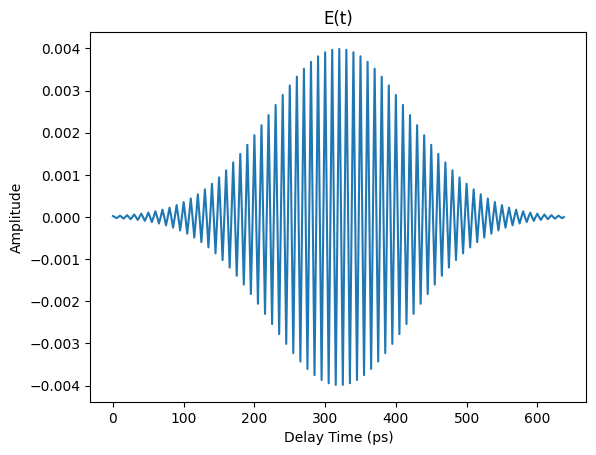

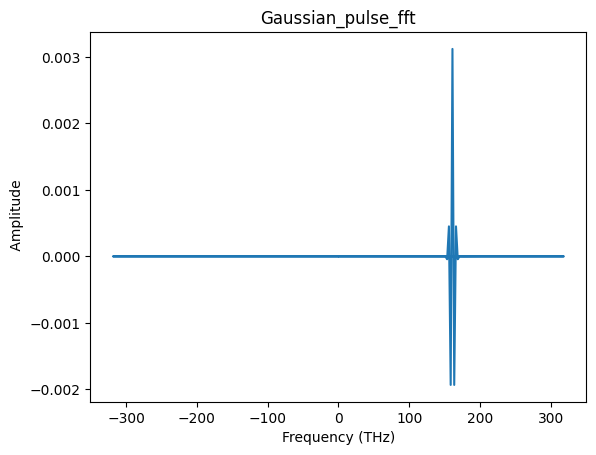

In [6]:
N = 256
dt = 2.5

t, freq = axis(N, dt)[0], axis(N, dt)[1]

TG = gaussian_p(100, 320, 0.5, t)
TG_FFT = np.fft.fft(TG) / (N / 2)

plot(t, TG, 'Delay Time (ps)', 'Amplitude', 'E(t)')
plot(np.fft.fftshift(freq), TG_FFT, 'Frequency (THz)', ' Amplitude', 'Gaussian_pulse_fft')

# RT(t) & its FFT

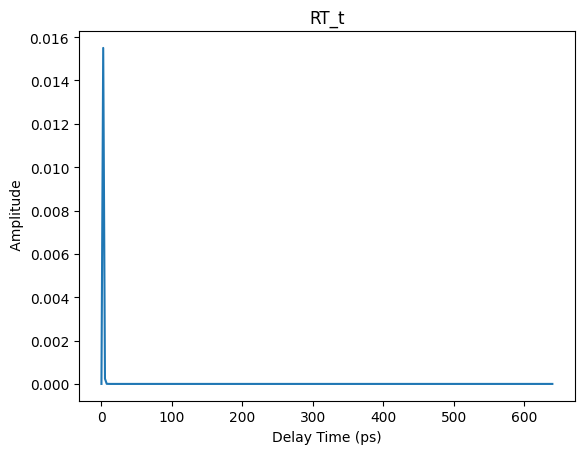

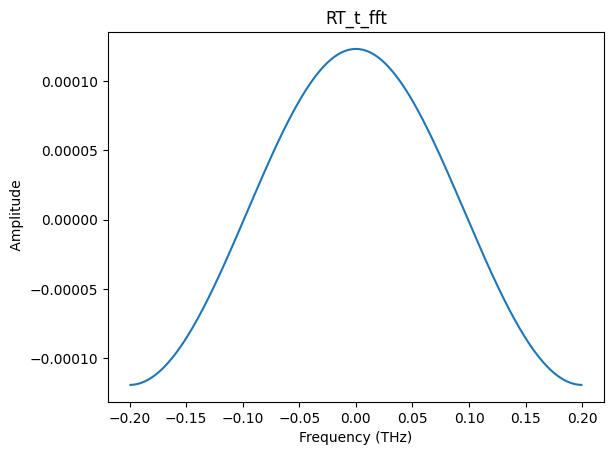

In [6]:
tauT = 0.6
tauC = 0.3
tauR = 0.6

N = 256
dt = 2.5

t, freq = axis(N, dt)[0], axis(N, dt)[1]

TG = gaussian_p(100, 320, 0.5, t)

u = np.heaviside(t, 1)

RT_t = u * (1 - np.exp(- t / tauC)) * np.exp(- t / tauT)
RT_t_FFT = np.fft.fft(RT_t) / (N / 2)


plot(t, RT_t, 'Delay Time (ps)', ' Amplitude', 'RT_t')
plot(np.fft.fftshift(freq), np.fft.fftshift(RT_t_FFT), 'Frequency (THz)', ' Amplitude', 'RT_t_fft')

# Gaussian_pulse_intensity x Response function & its FFT 1st **(Wrong)**
<p>Since the central of gaussian pulse is at t = 600, and RT_t(t) acts on t = 0, their convolution is nothing.<br>
    
np.convolve(I_t, RT_t, 'same') is wrong.<br>
Mode ‘same’ returns output of length max(M, N). Boundary effects are still visible.<br>
</p>

In [10]:
# tauT = 0.6
# tauC = 0.3
# tauR = 0.6
# s = 0

# N = 256
# dt = 5

# t = axis(N, dt)[0]
# freq = axis(N, dt)[1]

# u = np.heaviside(t, 1)

# E_t = gaussian_p(100, 600, 0.5, t)
# I_t = abs(E_t) ** 2

# RT_t = u * (1 - np.exp(- (t - s)/ tauC)) * np.exp(- (t - s) / tauT)

# Response = np.convolve(I_t, RT_t, 'same')
# Response_FFT = np.fft.fft(Response)

# plot(t, E_t, 'Delay Time (ps)', ' Amplitude', 'Gaussian_pulse')
# plot(t, I_t, 'Delay Time (ps)', 'Amplitude', 'Gaussian_pulse_intensity')
# plot(t, RT_t, 'Delay Time (ps)', 'Amplitude', 'RT_t(t)')
# plot(t, Response, 'Delay Time (ps)', 'Amplitude', 'Response')
# plot(np.fft.fftshift(freq), np.fft.fftshift(Response_FFT), 'Frequency', 'Amplitude', 'Response_FFT')

# Gaussian_pulse_intensity x Response function & its FFT 2nd **(Wrong)**
<p>The default mode in np.convolve function is 'full'.<br>
It means the convolution at each point of overlap, with an output shape of (N + M - 1), where N and M are the arrays of two functions.<br>
At the end-points of the convolution, the signals do not over completely, and boundary effects may be seen.</p>
<p>Two axis were extended to 2 * N * dt in 'full' mode, so I created new axis, t1 and freq1.<br>
I thought that if the sigma of gaussian pulse was 100, it needed 2 * 3 * sigma to draw a whole gaussian pulse at least, and i could also determined mu.</p>

In [9]:
# tauT = 0.6
# tauC = 0.3
# tauR = 0.6

# N = 256
# dt = 2.5

# t, freq = axis(N, dt)[0], axis(N, dt)[1]

# u = np.heaviside(t, 1)

# E_t = gaussian_p(100, 320, 0.5, t)
# I_t = abs(E_t) ** 2

# RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)

# Response = np.convolve(I_t, RT_t, 'full')
# Response_FFT = np.fft.fft(Response) / (2*N / 2)

# t1, freq1 = axis(2*N, dt)[0], axis(2*N, dt)[1]


# plot(t1, Response, 'Delay Time', 'Amplitude', 'I_t * RT_t')
# plot(np.fft.fftshift(freq1), np.fft.fftshift(Response_FFT), 'Frequency', 'Amplitude', 'I_t * RT_t fft')

# The radiation field

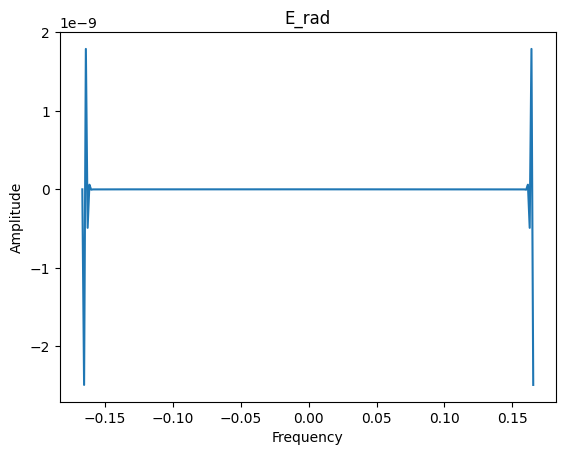

In [46]:
tauT = 0.6
tauC = 0.3
tauR = 0.6
s = 0

N = 256
dt = 3

t, freq = axis(N, dt)[0], axis(N, dt)[1]

Zt = 1j * freq
    
u = np.heaviside(t, 1)

E_t = gaussian_p(100, 400, 0.5, t)
E_w = np.fft.fft(E_t) / (N/2)

RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)
RT_w = np.fft.fft(RT_t) / (N/2)

E_rad = Zt * E_w * RT_w

plot(np.fft.fftshift(freq), np.fft.fftshift(E_rad), 'Frequency', 'Amplitude', 'E_rad')

# Gaussian_pulse_intensity x Response function & its FFT 3rd
### Gaussian pulse central at t = 0.
<p> 1. Change function axis.<br>
2. Create convolution t-axis: t_con= np.linspace(-0.5 * (N - 1) * dt, 1.5 * (N - 1) * dt, N*2 -1) <br>
3. Create convolution f-axis: freq_con = np.fft.fftfreq(N*2 - 1 , d=dt) <br>
4. Add I(t), RT(t), F{I(t)}, F{RT(t)} </p>

C:\Users\c3116\AppData\Local\Temp\ipykernel_2608\3472104045.py:16: RuntimeWarning: overflow encountered in exp
  RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)
C:\Users\c3116\AppData\Local\Temp\ipykernel_2608\3472104045.py:16: RuntimeWarning: invalid value encountered in multiply
  RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)


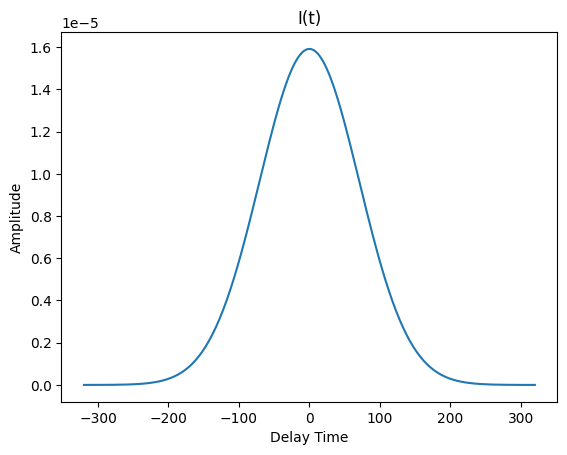

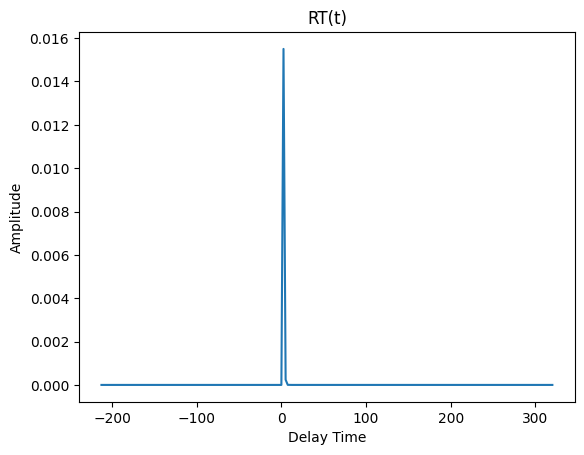

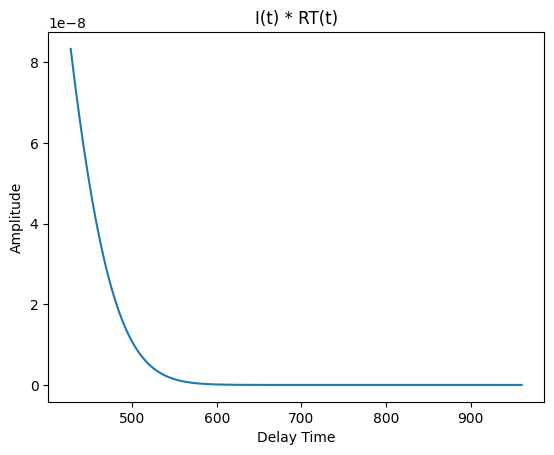

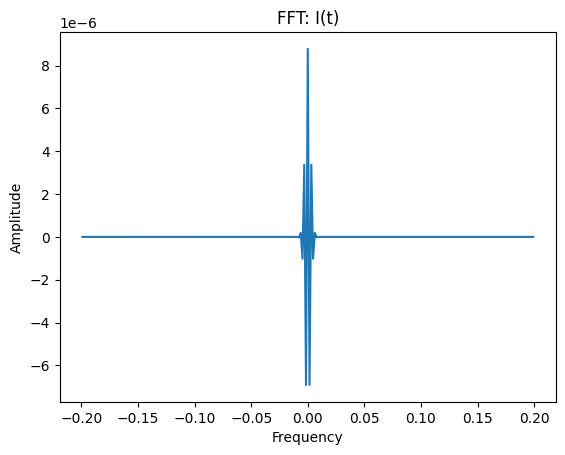

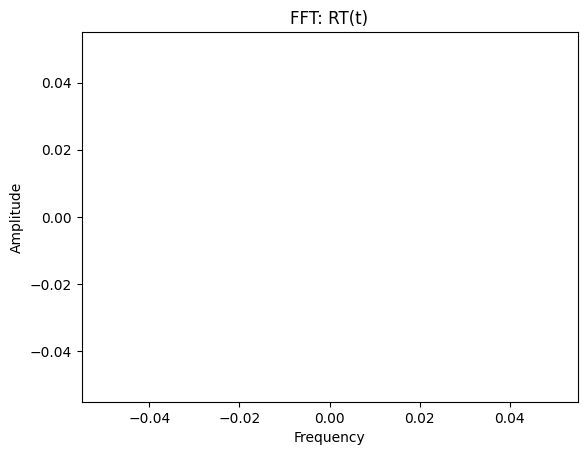

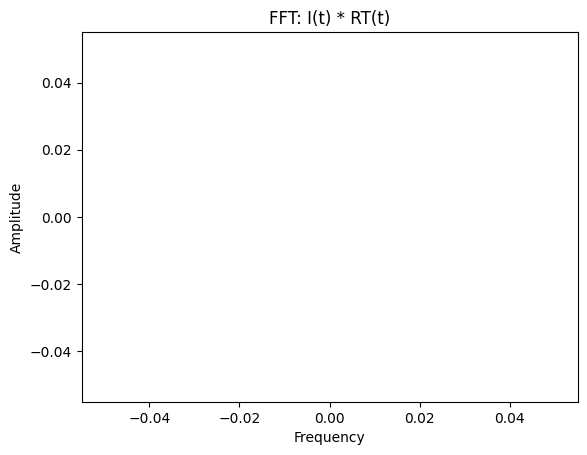

In [111]:
tauT = 0.6
tauC = 0.3
tauR = 0.6

N = 257
dt = 2.5

t, freq = axis(N, dt)[0], axis(N, dt)[1]

u = np.heaviside(t, 1)

E_t = gaussian_p(100, 0, 0.5, t)
I_t = abs(E_t) ** 2
I_t_fft = np.fft.fft(I_t) / (N/2)

RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)
RT_t_fft = np.fft.fft(RT_t) / (N/2)

Response = np.convolve(I_t, RT_t, 'full')
Response_fft = np.fft.fft(Response) / ((N*2 - 1) / 2)

t_con= np.linspace(-0.5 * (N - 1) * dt, 1.5 * (N - 1) * dt, N*2 -1)
freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)

plot(t, I_t, 'Delay Time', 'Amplitude', 'I(t)')
plot(t, RT_t, 'Delay Time', 'Amplitude', 'RT(t)')
plot(t_con, Response, 'Delay Time', 'Amplitude', 'I(t) * RT(t)')
plot(np.fft.fftshift(freq), np.fft.fftshift(I_t_fft), 'Frequency', 'Amplitude', 'FFT: I(t)')
plot(np.fft.fftshift(freq), np.fft.fftshift(RT_t_fft), 'Frequency', 'Amplitude', 'FFT: RT(t)')
plot(np.fft.fftshift(freq_con), np.fft.fftshift(Response_fft), 'Frequency', 'Amplitude', 'FFT: I(t) * RT(t)')

In [ ]:
t_relu = np.maximum(0.0, t)
RT_t = (1 - np.exp(- t_relu/tauC)) * np.exp(- t_relu/tauT)

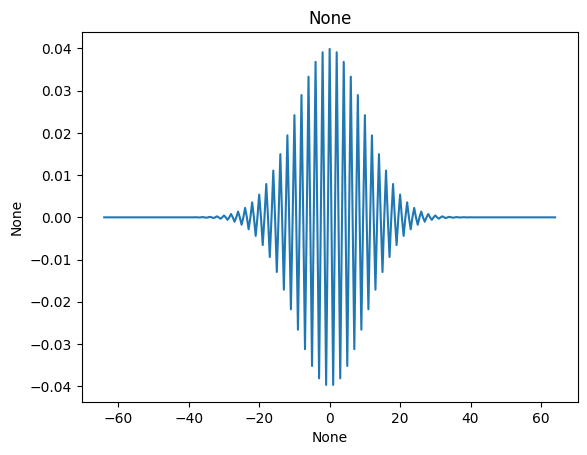

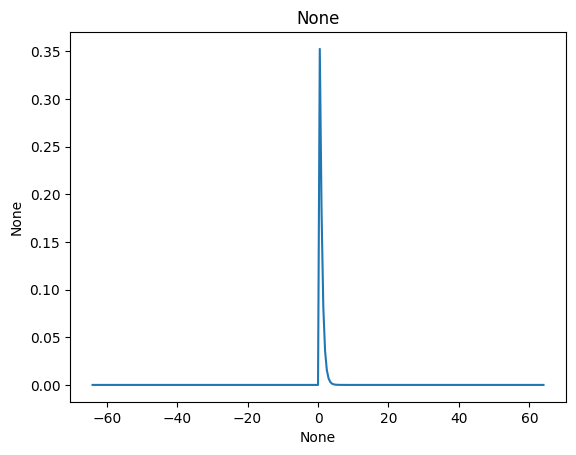

In [130]:
tauT = 0.6
tauC = 0.3
tauR = 0.6

N = 257
dt = 0.5

t, freq = axis(N, dt)[0], axis(N, dt)[1]

u = np.heaviside(t, 1)

E_t = gaussian_p(10, 0, 0.5, t)
I_t = abs(E_t) ** 2
I_t_fft = np.fft.fft(I_t)

t_relu = np.maximum(0.0, t)
RT_t = u * (1 - np.exp(- t_relu/tauC)) * np.exp(- t_relu/tauT)
RT_t_fft = np.fft.fft(RT_t)

Response = np.convolve(I_t, RT_t, 'full')
Response_fft = np.fft.fft(Response)

Response2_fft = I_t_fft * RT_t_fft

t_con= np.linspace(-0.5 * (N - 1) * dt, 1.5 * (N - 1) * dt, N*2 -1)
freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)

# plot(t, I_t, 'Delay Time', 'Amplitude', 'I(t)')
# plot(t, RT_t, 'Delay Time', 'Amplitude', 'RT(t)')
# plot(t_con, Response)
# plot(freq_con, Response_fft)

plot(t, E_t)
plot(t, RT_t)

# Draw F{I(t) * RT(t)} and F{I(t)} x F{RT(t)} on the same picture
### Gaussian pulse central at t = 0.

In [180]:
# tauT = 0.6
# tauC = 0.3
# tauR = 0.6

# N = 257
# dt = 2.5

# t, freq = axis(N, dt)[0], axis(N, dt)[1]

# u = np.heaviside(t, 1)

# E_t = gaussian_p(100, 0, 0.5, t)
# I_t = abs(E_t) ** 2
# I_t_fft = np.fft.fft(I_t) / (N/2)

# RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)
# RT_t_fft = np.fft.fft(RT_t) / (N/2)

# Response = np.convolve(I_t, RT_t, 'full')
# Response_fft = np.fft.fft(Response) / ((N*2 - 1) / 2)

# Response2_fft = I_t_fft * RT_t_fft

# t_con= np.linspace(-0.5 * (N - 1) * dt, 1.5 * (N - 1) * dt, N*2 -1)
# freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)

# plot(t, E_t)

# plt.plot(np.fft.fftshift(freq_con), np.fft.fftshift(Response_fft), label='F{I(t) * RT(t)}')
# plt.plot(np.fft.fftshift(freq), np.fft.fftshift(Response2_fft), label='F{I(t)} x F{RT(t)}')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.xlim(-0.01, 0.01)
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.title('Response FFT')
# plt.legend()
# plt.show()

# Gaussian_pulse & Response function convolution
### Gaussian pulse central is at t = (N-1) / 2 * dt.

In [181]:
# tauT = 0.6
# tauC = 0.3
# tauR = 0.6

# N = 257
# dt = 2.5

# t, freq = axis(N, dt)[0], axis(N, dt)[1]

# u = np.heaviside(t, 1)

# E_t = gaussian_p(100, (N-1)/2 * dt, 0.5, t)
# I_t = abs(E_t) ** 2
# I_t_fft = np.fft.fft(I_t) / (N/2)

# RT_t = u * (1 - np.exp(- t/tauC)) * np.exp(- t/tauT)
# RT_t_fft = np.fft.fft(RT_t) / (N/2)

# Response = np.convolve(I_t, RT_t, 'full')
# Response_fft = np.fft.fft(Response) / ((N*2 - 1) / 2)

# t_con= np.linspace(0.5 * dt, (N*2 - 1.5) * dt, N*2 -1)
# freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)

# plot(t, I_t, 'Delay Time', 'Amplitude', 'I(t)')
# plot(t, RT_t, 'Delay Time', 'Amplitude', 'RT(t)')
# plot(t_con, Response, 'Delay Time', 'Amplitude', 'I(t) * RT(t)')
# plot(np.fft.fftshift(freq), np.fft.fftshift(I_t_fft), 'Frequency', 'Amplitude', 'FFT: I(t)')
# plot(np.fft.fftshift(freq), np.fft.fftshift(RT_t_fft), 'Frequency', 'Amplitude', 'FFT: RT(t)')
# plot(np.fft.fftshift(freq_con), np.fft.fftshift(Response_fft), 'Frequency', 'Amplitude', 'FFT: I(t) * RT(t)')

# Draw F{I(t) * RT(t)} and F{I(t)} x F{RT(t)} on the same picture
### Gaussian pulse central at t = (N-1)/2 * dt.
<p>FFT is not divided by 0.5 N.</p>

In [174]:
# tauT = 0.6
# tauC = 0.3
# tauR = 0.6

# N = 256
# dt = 2.5

# t, freq = axis(N, dt)[0], axis(N, dt)[1]

# u = np.heaviside(t, 1)

# E_t = gaussian_p(100, (N-1)/2 * dt, 0.5, t)
# I_t = abs(E_t) ** 2
# I_t_fft = np.fft.fft(I_t)

# t_relu = np.maximum(0.0, t)
# RT_t = u * (1 - np.exp(- t_relu/tauC)) * np.exp(- t_relu/tauT)
# RT_t_fft = np.fft.fft(RT_t)

# Response = np.convolve(I_t, RT_t, 'full')
# Response_fft = np.fft.fft(Response)

# Response2_fft = I_t_fft * RT_t_fft

# t_con= np.linspace(0.5 * dt, (N*2 - 1.5) * dt, N*2 -1)
# freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)

# plot(t, E_t, 'Delay_time', 'Amplitude', 'E_t')
# plt.plot(np.fft.fftshift(freq_con), np.fft.fftshift(Response_fft), label='F{I(t) * RT(t)}')
# plt.plot(np.fft.fftshift(freq), np.fft.fftshift(Response2_fft), label='F{I(t)} x F{RT(t)}')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# # plt.xlim(-0.01, 0.01)
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.title('Response FFT')
# plt.legend()
# plt.show

# Gaussian_pulse & Response function convolution
Gaussian pulse central is at t = 0 and sigma = 10.<br>
=> ABS(F{I(t) * RT(t)}) = ABS(F{I(t) * RT(t)})

In [18]:
N = 257
dt = 0.5

t, freq = axis(N, dt)
t_relu = np.maximum(0.0, t)

E_t = gaussian_p(10, 10, 0.5, t)
I_t = abs(E_t) ** 2
I_t_fft = np.fft.fft(I_t)

E_w = np.fft.fft(E_t)

u = np.heaviside(t, 1)
RT_t = u * (1 - np.exp(- t_relu/tauC)) * np.exp(- t_relu/tauT)
RT_t_fft = np.fft.fft(RT_t)

Response = np.convolve(I_t, RT_t, 'full')
Response_fft = np.fft.fft(Response)

Response2_fft = I_t_fft * RT_t_fft

t_con= np.linspace(-0.5 * (N - 1) * dt, 1.5 * (N - 1) * dt, N*2 -1)
freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)


plot(t, E_t, 'Delay_time', 'Amplitude', 'E_t')
plt.plot(np.fft.fftshift(freq_con), np.fft.fftshift(Response_fft), label='F{I(t) * RT(t)}')
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(Response2_fft), label='F{I(t)} x F{RT(t)}')
plt.plot(np.fft.fftshift(freq_con), abs(np.fft.fftshift(Response_fft)), label='ABS(F{I(t) * RT(t)})')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlim(-0.25, 0.25)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Response FFT')
plt.legend()
plt.show

TypeError: bad operand type for abs(): 'tuple'

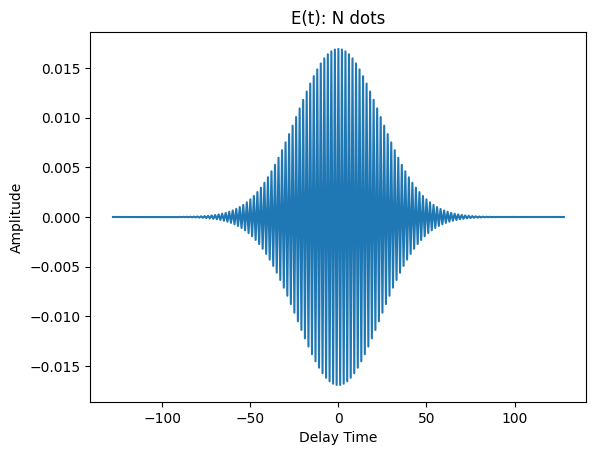

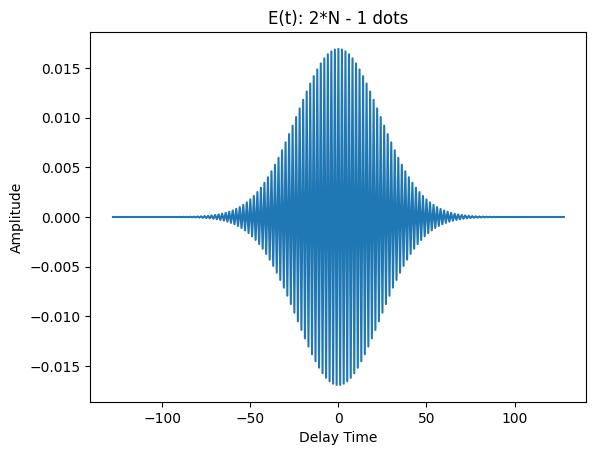

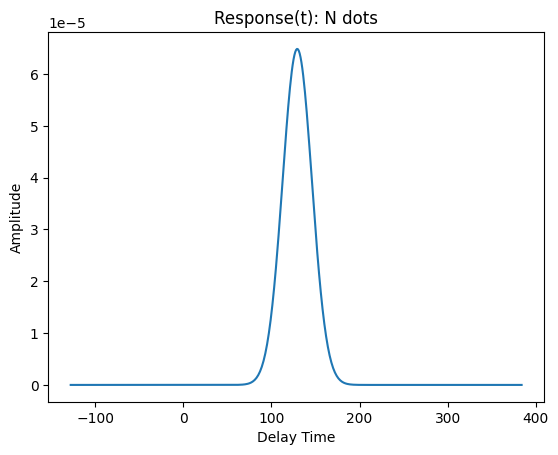

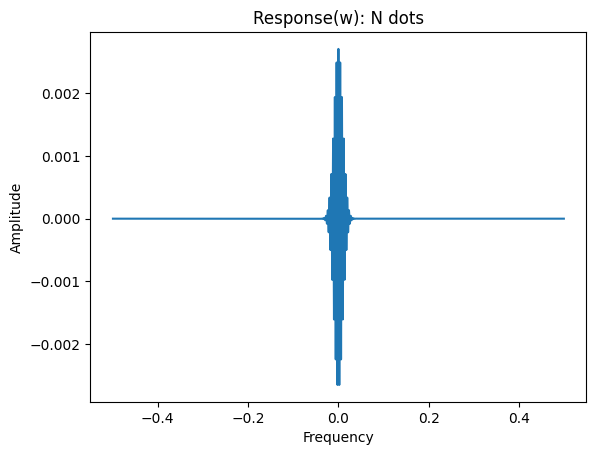

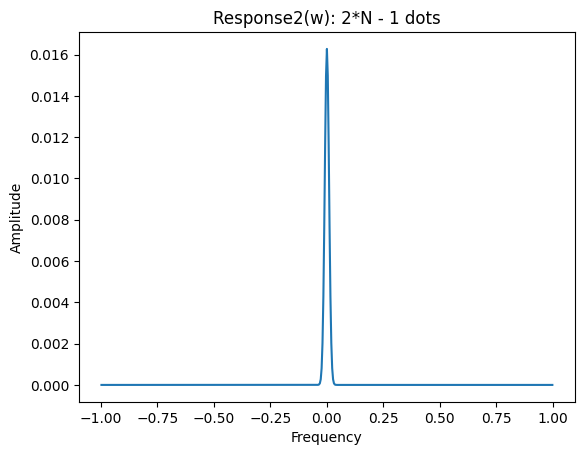

In [69]:
tauT = 0.6
tauC = 0.3
tauR = 0.6

N = 257
dt = 1

M = 2*N - 1
dT = 0.5

t, freq = axis(N, dt)
t1, freq1 = axis(M, dT)

E_t, I_t, I_t_fft = gaussian_p(10, 0, 0, 0.5, t)
E_t1, I_t1, I_t_fft1 = gaussian_p(10, 0, 0, 0.5, t1)

RT_t, RT_t_fft = RT(t)
RT_t1, RT_t_fft1 = RT(t1)

Response = np.convolve(I_t, RT_t, 'full')
Response_fft = np.fft.fft(Response)

Response2_fft = I_t_fft1 * RT_t_fft1

t_con= np.linspace(-0.5 * (N - 1) * dt, 1.5 * (N - 1) * dt, N*2 -1)
freq_con = np.fft.fftfreq(N*2 - 1 , d=dt)

plot(t, E_t, 'Delay Time', 'Amplitude', 'E(t): N dots')
plot(t1, E_t1, 'Delay Time', 'Amplitude', 'E(t): 2*N - 1 dots')
plot(t_con, Response, 'Delay Time', 'Amplitude', 'Response(t): N dots')
plot(np.fft.fftshift(freq_con), np.fft.fftshift(Response_fft), 'Frequency', 'Amplitude', 'Response(w): N dots')
plot(np.fft.fftshift(freq1), np.fft.fftshift(Response2_fft), 'Frequency', 'Amplitude', 'Response2(w): 2*N - 1 dots')

[0. 0. 0. 0. 1. 2. 3.]


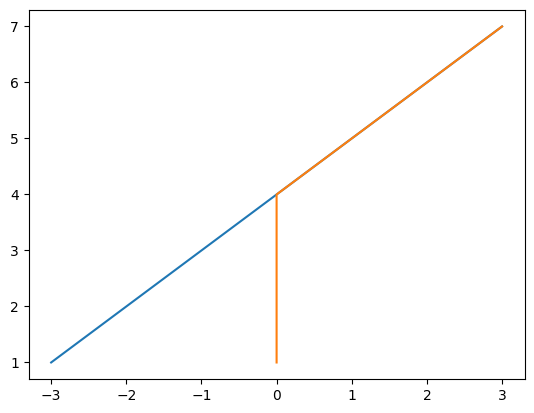

In [9]:
a = [-3, -2, -1, 0, 1, 2, 3]
b = [1, 2, 3, 4, 5, 6, 7]

c = np.maximum(0.0, a)
print(c)

plt.plot(a, b)
plt.plot(c, b)

# Gaussian pulse with linear chirp in frequency domain

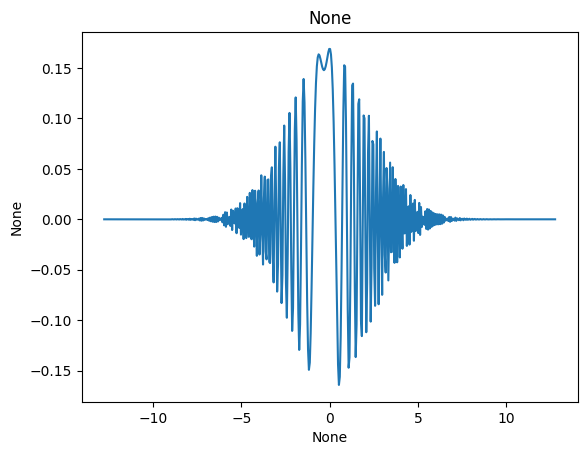

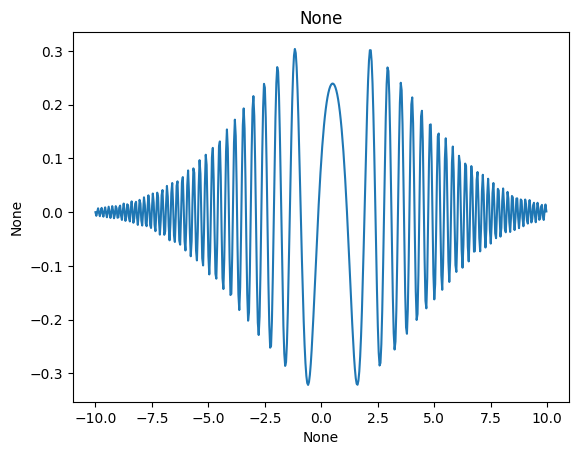

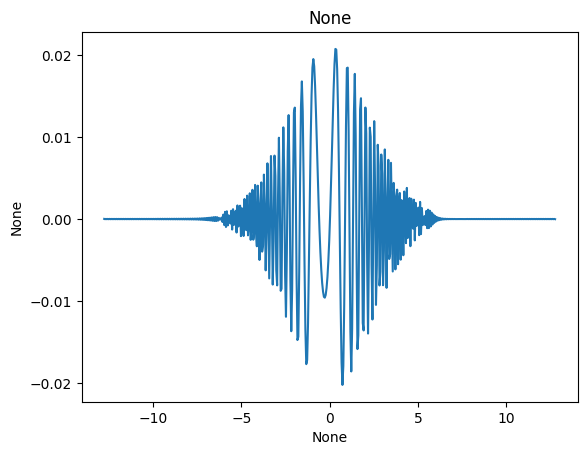

In [190]:
N = 512
dt = 0.05

t, freq = axis(N, dt)

E_w, E_w_ifft = gaussian_fp(1, 5, 0.5, freq)

E_t, I_t, I_t_fft = gaussian_p(1, 0, 5, 0.5, t)

plot(t, E_t)
plot(np.fft.fftshift(freq), np.fft.fftshift(E_w))
plot(t, np.fft.ifftshift(E_w_ifft))

# Gaussian pulse with linear chirp

C:\Users\c3116\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


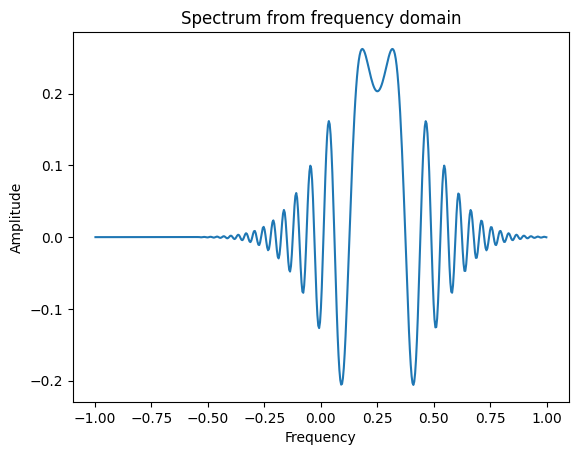

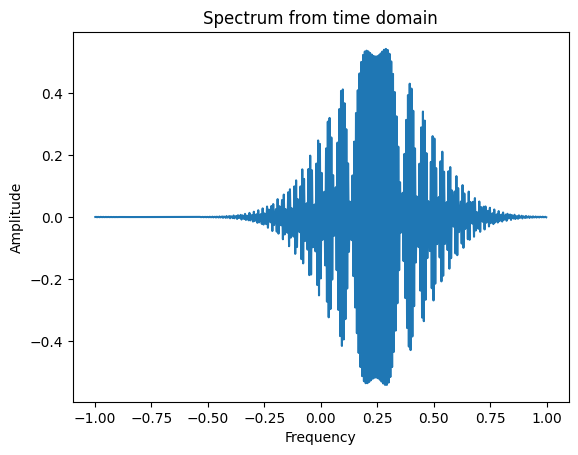

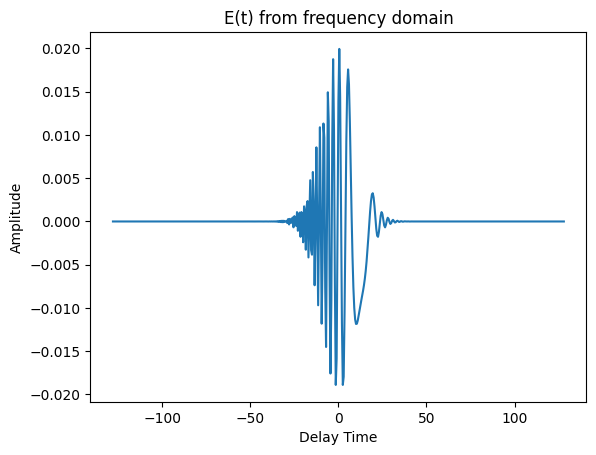

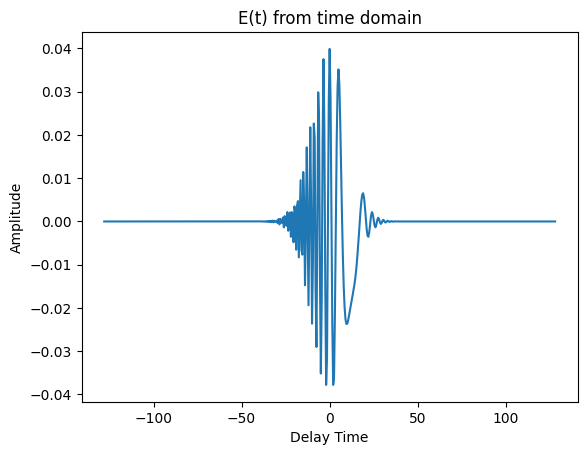

In [3]:
N = 513
dt = 0.5
sigma = 10
a = 1 / (2 * sigma**2)
b = -0.065
c = a**2 + b**2

t, freq = axis(N, dt)
w0 = twopi * 0.25
w = twopi * freq

E_t = (1 / (sigma * np.sqrt(twopi))) * np.exp(- (t **2) * a) * np.exp(1j * (w0 * t + b * t**2))
E_t_fft = np.fft.fft(E_t)

E_w = (1 / (np.sqrt(2) * sigma)) * (1 / np.sqrt(a - 1j*b)) * np.exp(-a * (w0 - w)**2 / (4*c)) * np.exp(-1j * b * (w0 - w)**2 / (4*c))
E_w_ifft = np.fft.ifft(E_w)

plot(np.fft.fftshift(freq), np.fft.fftshift(E_w), 'Frequency', 'Amplitude', 'Spectrum from frequency domain')
plot(np.fft.fftshift(freq), np.fft.fftshift(E_t_fft), 'Frequency', 'Amplitude', 'Spectrum from time domain')
plot(t, np.fft.ifftshift(E_w_ifft), 'Delay Time', 'Amplitude', 'E(t) from frequency domain')
plot(t, E_t, 'Delay Time', 'Amplitude', 'E(t) from time domain')

# Gaussian pulse in frequecy domain
<p>E(w) = E0 * exp(-i * phi(w)) <br>
phi(w) = phi0 + phi1(w - w0) + 0.5 * phi2(w - w0)**2 + ... </p>

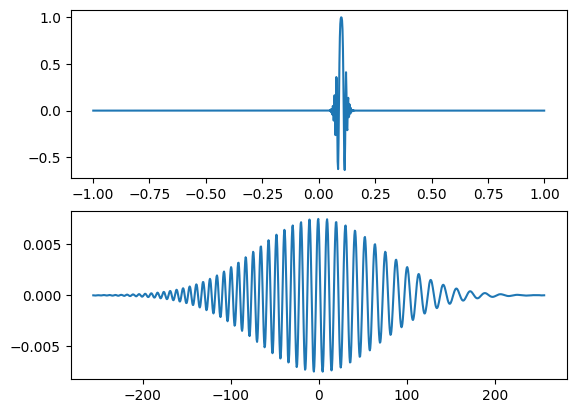

In [6]:
sigma = 10

GD = 0
GDD = 700
w0 = twopi * 0.1

N = 1025
dt = 0.5

t, freq = axis(N, dt)
w = twopi * freq

E_w = np.exp(-((w - w0)**2 * sigma**2) / 2) * np.exp(1j * (GD * (w - w0) + 0.5 * GDD * (w -w0)**2))
E_t = np.fft.ifft(E_w)


plt.subplot(2,1,1)
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(E_w))
plt.subplot(2,1,2)
plt.plot(t, np.fft.ifftshift(E_t))
plt.show()